## Problem Statement : Logistic Regression and SVM for Credit Card Fraud Detection. 
### In this tutorial, I have used logistic regression and SVM to predict whether a credit card transaction is fraudulent or not using the Credit Card Fraud Detection dataset which is downloaded from kaggle

### Tasks:

###  Use the dataset as “creditcardfraud.csv”.

In [1]:
# import all necessary libraries 
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import warnings

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
creditCardFraudDataFrame = pd.read_csv("data/creditcardfraud.csv") # Read csv file

In [5]:
creditCardFraudDataFrame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82450,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
1,50554,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
2,55125,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
3,116572,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
4,90434,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,160243,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,...,0.203563,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1
596,110547,-1.532810,2.232752,-5.923100,3.386708,-0.153443,-1.419748,-3.878576,1.444656,-1.465542,...,0.632505,-0.070838,-0.490291,-0.359983,0.050678,1.095671,0.471741,-0.106667,0.76,1
597,70071,-0.440095,1.137239,-3.227080,3.242293,-2.033998,-1.618415,-3.028013,0.764555,-1.801937,...,0.764187,-0.275578,-0.343572,0.233085,0.606434,-0.315433,0.768291,0.459623,227.30,1
598,93879,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,30.31,1


###  Preprocess the data by:

### ● Dropping the Time column since it is not useful for classification

In [6]:
creditCardFraudDataFrame[['Time']] # Display Time column in the form of Dataframe

,Time
0,82450
1,50554
2,55125
3,116572
4,90434
...,...
595,160243
596,110547
597,70071
598,93879


In [7]:
creditCardFraudDataFrame.columns # Display all columns of Dataframe

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Drop column Time as it is not required for processing and to find accuracy of model
creditCardFraudDataFrame.drop(creditCardFraudDataFrame[['Time']], axis = 1, inplace = True)

In [9]:
creditCardFraudDataFrame.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

### ● Scaling the Amount column using a standard scaler.

In [12]:
# Standard Scaler scale the Amount Column with distribution with 0 mean value and variance equal to 1.
stdScalerObj = StandardScaler()

In [13]:
scaledAmountColumn = stdScalerObj.fit_transform(creditCardFraudDataFrame[['Amount']]).flatten()

In [14]:
scaledAmountColumn

array([-4.43050529e-01, -4.27820564e-01, -3.79636872e-01, -1.92602209e-01,
       -4.46434966e-01, -2.50983743e-01, -2.24531698e-01, -2.90572747e-01,
        5.28817203e-01, -3.93664472e-01, -2.86564861e-01, -4.37617617e-01,
        3.54910147e-02, -1.96209307e-01, -4.01947435e-01, -3.84134610e-01,
        1.49382700e+00, -1.31815944e-01, -3.39157227e-01, -3.67078830e-01,
        1.87809417e+00, -3.57370841e-01, -3.98607531e-01, -4.41981760e-01,
        5.18084976e-01,  3.51072864e+00, -4.37617617e-01,  1.59201084e-01,
       -4.42471612e-01, -3.95802011e-01, -1.93092062e-01, -3.11102028e-01,
       -3.25218692e-01, -3.59597444e-01, -3.73847704e-01, -3.48508960e-01,
       -3.79636872e-01, -4.43005997e-01, -4.30447955e-01, -4.12768727e-01,
       -2.14868241e-01, -3.52472314e-01, -4.10853848e-01, -3.94065260e-01,
       -9.46316719e-02, -2.23774653e-01,  6.55946890e-02,  8.17874821e-01,
       -2.22884012e-01, -3.12838778e-01, -3.73224255e-01, -4.43005997e-01,
       -4.42026292e-01, -

In [15]:
creditCardFraudDataFrame['Amount']

0        0.76
1        4.18
2       15.00
3       57.00
4        0.00
        ...  
595    156.00
596      0.76
597    227.30
598     30.31
599     99.99
Name: Amount, Length: 600, dtype: float64

In [16]:
# Modify original Amount column with Scaled Amount column
creditCardFraudDataFrame['Amount'] = scaledAmountColumn

In [17]:
creditCardFraudDataFrame['Amount']

0     -0.443051
1     -0.427821
2     -0.379637
3     -0.192602
4     -0.446435
         ...   
595    0.248265
596   -0.443051
597    0.565779
598   -0.311458
599   -0.001159
Name: Amount, Length: 600, dtype: float64

### ● Split the data into training and test sets using a 80:20 split ratio. Use random_state=42 for reproducibility.

In [18]:
# Declare Independent varibles as 2D Dataframe or array
X_model = creditCardFraudDataFrame[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']] 

In [19]:
# Declare dependent varibles as 1D array
Y_model = creditCardFraudDataFrame['Class']

In [20]:
# Split the dataset into train and testing part with ratio of 80:20 and random_state=42
x_train_model, x_test_model, y_train_model,y_test_model = train_test_split(X_model, Y_model, test_size=0.2, random_state= 42)

In [21]:
x_train_model.shape

(480, 29)

In [22]:
x_test_model.shape

(120, 29)

### ●  Train a logistic regression model on the training set using the default hyperparameters

In [23]:
# create Logistic Regression object
# log_reg_model = LogisticRegression()

log_reg_model = LogisticRegression(penalty = "l2", dual = False, tol = 1e-4, C = 1.0,
                                   fit_intercept = True, intercept_scaling = 1,
                                   random_state = None, solver = "lbfgs")


In [24]:
# fit the training data into model
log_reg_model.fit(x_train_model, y_train_model)


LogisticRegression()

In [25]:
# predict the y data using x testing data 
y_pred_log_reg = log_reg_model.predict(x_test_model)

In [26]:
accuracy_log_reg_model = accuracy_score(y_test_model,y_pred_log_reg)
print("accuracy of logistic regression model before GridCV:", accuracy_log_reg_model)

accuracy of logistic regression model before GridCV: 0.9416666666666667


### ●  Evaluate the model's performance on the test set using:


### ● Confusion matrix

In [27]:
#compute the confusion matrix.
confusion_matrix_log_reg = confusion_matrix(y_test_model,y_pred_log_reg)
confusion_matrix_log_reg

array([[59,  3],
       [ 4, 54]])

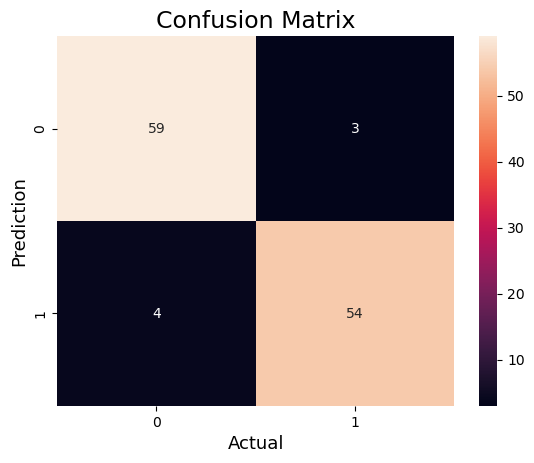

In [28]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix_log_reg, annot = True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### ● Classification report

In [29]:
#compute the classification report matrix.
print(classification_report(y_test_model, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        62
           1       0.95      0.93      0.94        58

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



### ●  Train an SVM model on the training set using the default hyperparameters. Evaluate the model's performance on the test set using the same evaluation metrics as in step 4

In [30]:
# SVC model object with default parameters
# svc_model = SVC()
svc_model = SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale',
                coef0 = 0.0, shrinking = True, probability = False, tol = 1e-3, 
                cache_size = 200, class_weight = None,verbose = False, 
                max_iter = -1, decision_function_shape = "ovr", 
                break_ties = False, random_state = None)

In [31]:
# fit the training data into model
svc_model.fit(x_train_model,y_train_model)

SVC()

In [32]:
# predict the y data using x testing data 
y_pred_svc_model= svc_model.predict(x_test_model)

In [33]:
accuracy_svc_model =  accuracy_score(y_pred_svc_model,y_test_model)
print("accuracy of svc model before GridCV:", accuracy_svc_model)

accuracy of svc model before GridCV: 0.95


In [34]:
#compute the confusion matrix.
confusion_matrix_svc = confusion_matrix(y_test_model,y_pred_svc_model)
confusion_matrix_svc

array([[62,  0],
       [ 6, 52]])

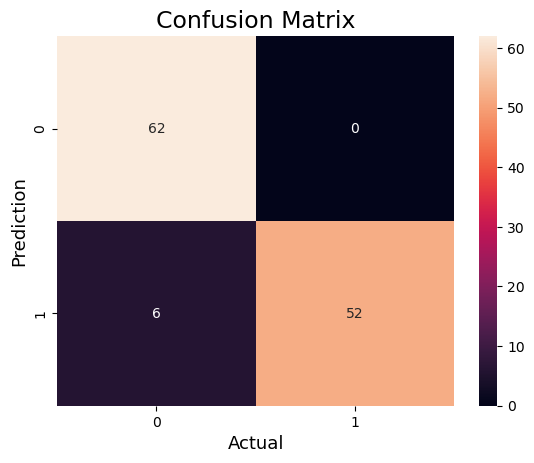

In [35]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix_svc, annot = True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [36]:
print(classification_report(y_test_model, y_pred_svc_model))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        62
           1       1.00      0.90      0.95        58

    accuracy                           0.95       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



### The results of our later model(SVC) increased from our initial model(LogisticRegression) with an accuracy score of 0.95 compared to 0.94, and an F1 score of 0.93 or 0.92 as compared to 0.94.

##### ●  Tune the hyperparameters of the logistic regression model and the SVM model using grid search cross-validation. Use a range of values for the hyperparameters of your choice. Choose the evaluation metric of your choice (e.g.Accuracy Score) to optimize the hyperparameters.

##### ●  Train the logistic regression model and the SVM model with the optimal hyperparameters on the training set. Evaluate their performance on the test set using the same evaluation metrics as in step 4.

### Implementing Gride search cross validation on Logistic regression model

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train_model,y_train_model)


/Users/jaspreetkaur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jaspreetkaur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/jaspreetkaur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jaspreetkaur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [38]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.95


These are hpyerparameters result given by model to get 95 accuracy. 

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}

accuracy : 0.95

###  Train Logistic Regression model with hyperparameters suggested by GridCV to get highest accuracy... 

In [39]:
log_r_grid_cv = LogisticRegression(C= 0.1, penalty="l2") # Create object

In [40]:
# fit the training data into model
log_r_grid_cv.fit(x_train_model,y_train_model)

LogisticRegression(C=0.1)

In [41]:
# predict the y data using x testing data 
y_pred_log_r_grid_cv = log_r_grid_cv.predict(x_test_model)

In [42]:
accuracy_log_r_Gride_model = accuracy_score(y_test_model,y_pred_log_r_grid_cv)
print("accuracy of Logistic regression model after GrideCV :", accuracy_log_r_Gride_model)

accuracy of Logistic regression model after GrideCV : 0.9583333333333334


In [43]:
#compute the confusion matrix.
confusion_log_r_grid_cv_matrix_ = confusion_matrix(y_test_model,y_pred_log_r_grid_cv)
confusion_log_r_grid_cv_matrix_


array([[61,  1],
       [ 4, 54]])

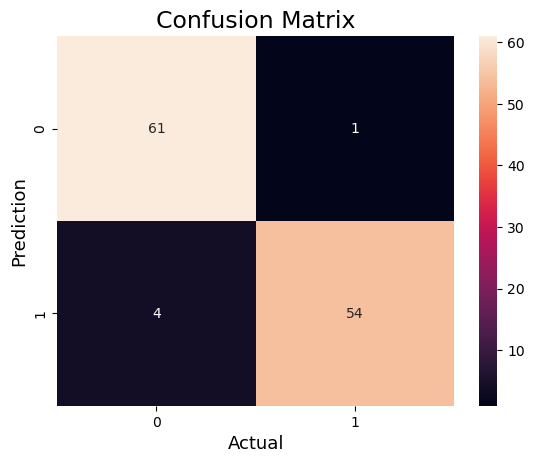

In [44]:
#Plot the confusion matrix.
sns.heatmap(confusion_log_r_grid_cv_matrix_, annot = True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [45]:
print(classification_report(y_test_model, y_pred_log_r_grid_cv))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.98      0.93      0.96        58

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### Implementing Gride search cross validation on SVM model

In [46]:
# Applying Grid Search to find the best model and the best parameters

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grid_search = GridSearchCV(estimator = svc_model,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           refit = True, verbose = 3)
grid_search = grid_search.fit(x_train_model, y_train_model)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.896 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.906 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.948 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.979 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.906 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.906 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.917 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END ...C=1000, gamm

In [47]:
accuracy = grid_search.best_score_
accuracy

0.9458333333333334

In [48]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

### Train SVC Model with hyperparamter suggested by GridCV

In [49]:
svc_grid_cv_model = SVC(kernel = 'rbf', gamma=0.0001, C = 1000)

In [50]:
# fit the training data into model
svc_grid_cv_model.fit(x_train_model, y_train_model)

SVC(C=1000, gamma=0.0001)

In [51]:
# Predicting the Test set results
y_pred_grid_cv_svc_model = svc_grid_cv_model.predict(x_test_model)

In [52]:
accuracy_svc_Gride_cv_model =accuracy_score(y_test_model,y_pred_grid_cv_svc_model)
print("accuracy of SVC model after GrideCV :", accuracy_svc_Gride_cv_model)

accuracy of SVC model after GrideCV : 0.95


In [53]:
#compute the confusion matrix.
confusion_matrix_svc_grid_cv = confusion_matrix(y_test_model,y_pred_grid_cv_svc_model)
confusion_matrix_svc_grid_cv

array([[61,  1],
       [ 5, 53]])

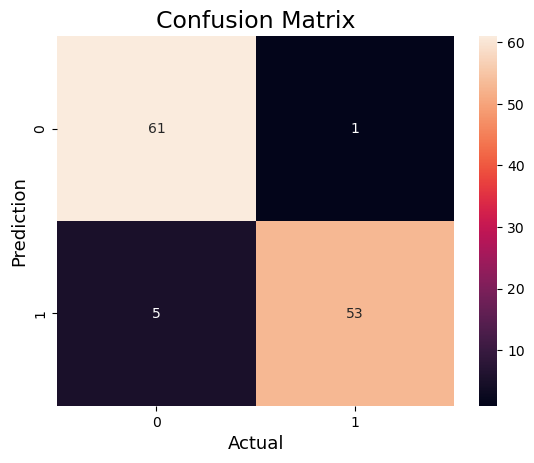

In [54]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix_svc_grid_cv, annot = True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [55]:
print(classification_report(y_test_model, y_pred_grid_cv_svc_model))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        62
           1       0.98      0.91      0.95        58

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



###  ●  Compare the performance of the logistic regression model and the SVM model using the evaluation metrics from steps 4 and 7. Interpret the results and provide insights on which model performed better and why.


### ●  Summarize your findings and conclusions in a brief report.

#### The accuracy score will help us to find the performance of different models...
#### The model with higher accuracy score will perform much better than others... 
#### I have display the accuracy score for different models.. to compare them

In [56]:
print("\nAccuracy of logistic regression model before and after GridCV\n")
print("* Accuracy before:", accuracy_log_reg_model)
print("* Accuracy after:", accuracy_log_r_Gride_model)


Accuracy of logistic regression model before and after GridCV

* Accuracy before: 0.9416666666666667
* Accuracy after: 0.9583333333333334


In [57]:
print("\nAccuracy of SVC model before and after GridCV :\n")
print("* Accuracy before:", accuracy_svc_model)
print("* Accuracy after:", accuracy_svc_Gride_cv_model)


Accuracy of SVC model before and after GridCV :

* Accuracy before: 0.95
* Accuracy after: 0.95


### Conclusion 

#### Comparing these four models, i have concluded that the logistic regression model after implementing GridCv with accuracy score of 96% is the best model to be able to predict whether a credit card transaction is fraudulent or not from our dataset. 